In [17]:
import pandas as pd
import numpy as np
from scipy.stats import norm
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sp
import statsmodels.api as sm

sns.set()

%matplotlib inline

### Example: Web Stickiness

In [90]:
df_session_times = pd.read_csv('../data/web_page_data.csv')
df_session_times.Time = df_session_times.Time * 100

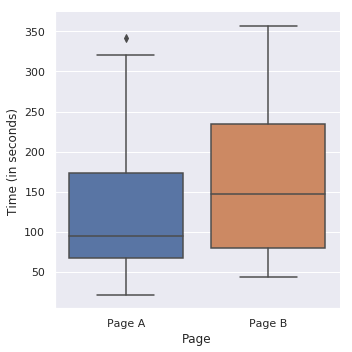

In [91]:
_ = sns.catplot(x='Page',y='Time',data=df_session_times,kind='box')
_ = plt.ylabel('Time (in seconds)')

In [95]:
mean_a,mean_b = df_session_times.groupby('Page').Time.mean().values

mean_b - mean_a

35.66666666666667

In [23]:
def perm_fun(x,n1,n2):
    n = n1 + n2
    idx = np.random.permutation(n)
    idx_a = idx[:n1]
    idx_b = idx[n1:]
    mean_diff = np.mean(x[idx_a]) - np.mean(x[idx_b])
    return mean_diff

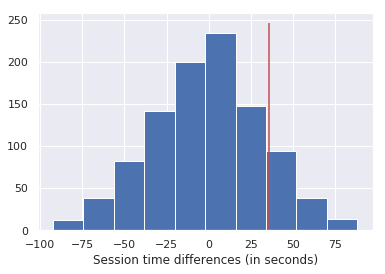

In [25]:
perm_diffs = []
for i in range(1000):
    perm_diffs.append(perm_fun(df_session_times.Time,21,15))
_ = plt.hist(perm_diffs)
_ = plt.xlabel('Session time differences (in seconds)')
_ = plt.vlines(mean_b-mean_a,*plt.ylim(),color='r')

### Statistical Significance and P-Values

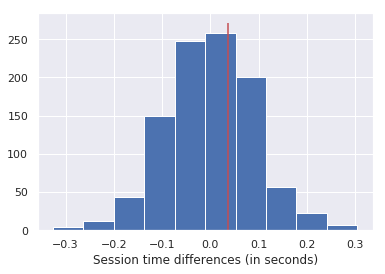

In [26]:
obs_pct_diff = 100*(200/23739 - 182/22588)
conversion = np.concatenate([np.zeros(45945),np.ones(382)])
perm_diffs = []
for i in range(1000):
    perm_diffs.append(100*perm_fun(conversion,23739,22588))
_ = plt.hist(perm_diffs)
_ = plt.xlabel('Session time differences (in seconds)')
_ = plt.vlines(obs_pct_diff,*plt.ylim(),color='r')

### P-Value

In [10]:
np.mean(np.array(perm_diffs) > obs_pct_diff)

0.323

In [11]:
zstat,p_value = sm.stats.proportions_ztest([200,182],[23739,22588],alternative='larger')
print(p_value)

0.33094407441560325


### t-Tests

In [12]:
tstat,pvalue,df = sm.stats.ttest_ind(df_session_times[df_session_times.Page == 'Page A'].Time,
                                     df_session_times[df_session_times.Page == 'Page B'].Time,
                                     alternative='smaller'
                                    )
print(pvalue)

0.1345051218196303
